A depressão é uma doença mental grave que pode ser identificada por seus sintomas distintivos, que incluem sentimentos de melancolia e vazio, preocupação e distúrbios do sono, bem como uma perda geral de iniciativa e interesse em atividades. Além disso, sintomas como sensação de culpa ou falta de valor, diminuição da energia, dificuldades de concentração, ideação suicida e sintomas psicóticos podem estar presentes. O número, gravidade e duração dos sintomas, assim como o impacto na capacidade de funcionar socialmente e no trabalho, são fatores que determinam a gravidade de uma depressão. A ansiedade é uma resposta natural ao estresse, e há situações em que ela pode ser realmente útil. Ela pode nos alertar sobre ameaças potenciais, nos ajudar a nos preparar para elas e auxiliar na concentração. Os transtornos de ansiedade são diferentes das sensações cotidianas de preocupação ou ansiedade, porque envolvem níveis anormalmente altos dessas emoções. Os transtornos de ansiedade são o tipo mais comum de doença mental, afetando cerca de uma em cada quatro pessoas em algum momento de suas vidas. No entanto, esses transtornos podem ser tratados, e existem várias terapias que se mostraram eficazes. A maioria dos pacientes se beneficia do tratamento, o que lhes permite levar vidas normais e produtivas. A depressão e a ansiedade são muito comuns entre estudantes, o que afeta os estudos e o comportamento social dos alunos. O conjunto de dados é coletado de estudantes universitários da Universidade de Lahore. Há 787 participantes que contribuíram com os dados. Este conjunto de dados é gerado a partir da inspiração dos inventários de Depressão de Beck e Ansiedade de Beck.
Este conjunto de dados pode ser usado como base para avaliar diferentes métodos e abordagens de aprendizado de máquina, como a classificação da gravidade da depressão e ansiedade. Além disso, é adequado para comparar diferentes abordagens de classificação de aprendizado de máquina.

*Responsavel pela limpeza e integridade dos dados: Matheus Costa*

*Responsavel pela definição do problema: João*

*Especialistas no assunto: João e Thayla*	 

*Responsavel pelo ml: Vane Woll*

*Responsavel geral: Vane Woll*

| **Column** | **Description** |
| ------------ | :-----------------: |
| id | each number is a participant in the experiment |
| school_year | years in school |
| age | |
| gender | |
| bmi | body mass index |
| who_bmi | bmi category |
| phq_score | measure the severity of symptoms related to depression, anxiety, and other related disorders in patients |
| depression_severity | degree or intensity of symptoms experienced by an individual with depression |
| depressiveness | |
| suicidal | the candidate have suicide thought |
| depression_diagnosis | the candidate already have depression diagnosis |
| depression_treatment | the candidate already have depression treatment |
| gad_score | measure that assesses the severity of Generalized Anxiety Disorder |
| anxiety_severity |  intensity of symptoms experienced by an individual with anxiety |
| anxiousness | |
| anxiety_diagnosis | the candidate already have anxiety diagnosis |
| anxiety_treatment | the candidate already have anxiety treatment |
| epworth_score |  score to assess daytime sleepiness ytime sleepiness |
| sleepiness | |

In [34]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [2]:
#importe o data frame
df = pd.read_csv('depression_anxiety_data.csv')

In [3]:
#ver data frame
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [4]:
df.tail()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True
782,783,4,22,male,22.598140,Normal,6,Mild,False,False,False,False,6,Mild,False,False,False,0.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [6]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
gender,783,2,female,403
who_bmi,783,7,Normal,510
depression_severity,779,6,Mild,344
depressiveness,780,2,False,569
suicidal,782,2,False,713
depression_diagnosis,782,2,False,716
depression_treatment,779,2,False,722
anxiety_severity,783,5,Mild,303
anxiousness,777,2,False,587
anxiety_diagnosis,779,2,False,718


In [8]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_year,783.0,2.277139,1.163633,1.0,1.00000,2.000000,3.000000,4.000000
age,783.0,20.233716,1.767217,18.0,19.00000,20.000000,21.000000,31.000000
bmi,783.0,23.420533,4.563630,0.0,20.98942,23.140496,25.519924,54.552668
phq_score,783.0,7.123883,4.426580,0.0,4.00000,6.000000,9.000000,24.000000
gad_score,783.0,6.810983,4.727352,0.0,3.00000,6.000000,9.000000,21.000000
epworth_score,775.0,6.376774,3.996443,0.0,3.50000,6.000000,9.000000,32.000000


In [9]:
#ver colunas com dados faltantes
df.isna().any()

id                      False
school_year             False
age                     False
gender                  False
bmi                     False
who_bmi                 False
phq_score               False
depression_severity      True
depressiveness           True
suicidal                 True
depression_diagnosis     True
depression_treatment     True
gad_score               False
anxiety_severity        False
anxiousness              True
anxiety_diagnosis        True
anxiety_treatment        True
epworth_score            True
sleepiness               True
dtype: bool

In [10]:
#apagar os missings
df_temp = df.dropna(axis=0)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    765 non-null    int64  
 1   school_year           765 non-null    int64  
 2   age                   765 non-null    int64  
 3   gender                765 non-null    object 
 4   bmi                   765 non-null    float64
 5   who_bmi               765 non-null    object 
 6   phq_score             765 non-null    int64  
 7   depression_severity   765 non-null    object 
 8   depressiveness        765 non-null    object 
 9   suicidal              765 non-null    object 
 10  depression_diagnosis  765 non-null    object 
 11  depression_treatment  765 non-null    object 
 12  gad_score             765 non-null    int64  
 13  anxiety_severity      765 non-null    object 
 14  anxiousness           765 non-null    object 
 15  anxiety_diagnosis     765 no

In [11]:
df_temp.gender = df_temp.gender.map({'male':1, 'female':0})

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\3611159313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.gender = df_temp.gender.map({'male':1, 'female':0})


In [12]:
df_temp['depressiveness'] = df_temp['depressiveness'].astype(int)
df_temp

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\2304717332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['depressiveness'] = df_temp['depressiveness'].astype(int)


,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,Class I Obesity,9,Mild,0,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,1,19.841270,Normal,8,Mild,0,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,1,25.102391,Overweight,8,Mild,0,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,0,23.738662,Normal,19,Moderately severe,1,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,1,25.617284,Overweight,6,Mild,0,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,Normal,6,Mild,0,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,1,25.308642,Overweight,4,None-minimal,0,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,1,22.720438,Normal,2,None-minimal,0,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,0,23.033168,Normal,17,Moderately severe,1,False,False,False,19,Severe,True,False,False,15.0,True


In [13]:
df_temp['suicidal'] = df_temp['suicidal'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\1238079730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['suicidal'] = df_temp['suicidal'].astype(int)


In [14]:
df_temp['depression_diagnosis'] = df_temp['depression_diagnosis'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\509179704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['depression_diagnosis'] = df_temp['depression_diagnosis'].astype(int)


In [15]:
df_temp['depression_treatment'] = df_temp['depression_treatment'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\3139334525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['depression_treatment'] = df_temp['depression_treatment'].astype(int)


In [16]:
df_temp['anxiousness'] = df_temp['anxiousness'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\578758001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['anxiousness'] = df_temp['anxiousness'].astype(int)


In [17]:
df_temp['anxiety_diagnosis'] = df_temp['anxiety_diagnosis'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\458547913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['anxiety_diagnosis'] = df_temp['anxiety_diagnosis'].astype(int)


In [18]:
df_temp['anxiety_treatment'] = df_temp['anxiety_treatment'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\1602753193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['anxiety_treatment'] = df_temp['anxiety_treatment'].astype(int)


In [19]:
df_temp['sleepiness'] = df_temp['sleepiness'].astype(int)

C:\Users\vane\AppData\Local\Temp\ipykernel_14080\1331779921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['sleepiness'] = df_temp['sleepiness'].astype(int)


In [20]:
df_temp['who_bmi'].unique()

array(['Class I Obesity', 'Normal', 'Overweight', 'Not Availble',
       'Class III Obesity', 'Underweight', 'Class II Obesity'],
      dtype=object)

In [21]:
df_temp['depression_severity'].unique()

array(['Mild', 'Moderately severe', 'None-minimal', 'Moderate', 'Severe',
       'none'], dtype=object)

In [22]:
df_temp['anxiety_severity'].unique()

array(['Moderate', 'Mild', 'Severe', 'None-minimal'], dtype=object)

In [23]:
df_temp = pd.get_dummies(df_temp, columns=['who_bmi'
                                          ,'depression_severity'
                                          ,'anxiety_severity'], drop_first=True)

In [24]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 782
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     765 non-null    int64  
 1   school_year                            765 non-null    int64  
 2   age                                    765 non-null    int64  
 3   gender                                 765 non-null    int64  
 4   bmi                                    765 non-null    float64
 5   phq_score                              765 non-null    int64  
 6   depressiveness                         765 non-null    int32  
 7   suicidal                               765 non-null    int32  
 8   depression_diagnosis                   765 non-null    int32  
 9   depression_treatment                   765 non-null    int32  
 10  gad_score                              765 non-null    int64  
 11  anxiousness

**Colunas com dados faltantes:**
- depression_severity

-depressiveness

-suicidal

-depression_diagnosis

-depression_trearment

-anxiousness

-anxiety_diagnosis

-anxiety_treatment

-epworth_score

-sleepiness

In [25]:
df_temp.corr()

,id,school_year,age,gender,bmi,phq_score,depressiveness,suicidal,depression_diagnosis,depression_treatment,...,who_bmi_Overweight,who_bmi_Underweight,depression_severity_Moderate,depression_severity_Moderately severe,depression_severity_None-minimal,depression_severity_Severe,depression_severity_none,anxiety_severity_Moderate,anxiety_severity_None-minimal,anxiety_severity_Severe
id,1.000000,0.957983,0.657784,-0.011716,0.002906,-0.122582,-0.074063,-0.046727,0.020873,-0.019056,...,0.081206,0.016614,-0.068353,-0.028234,0.068521,-0.047119,0.092762,-0.091042,0.013224,-0.089138
school_year,0.957983,1.000000,0.637692,-0.016093,-0.010453,-0.124790,-0.073929,-0.063403,0.003725,-0.040394,...,0.060792,0.015492,-0.053600,-0.030170,0.072077,-0.067330,0.094285,-0.087632,0.015174,-0.100037
age,0.657784,0.637692,1.000000,0.030214,0.097000,-0.064811,-0.037974,-0.046948,0.065720,0.034627,...,0.098093,-0.021237,-0.015485,-0.041519,0.035965,0.005403,0.059279,-0.023893,0.006701,-0.078841
gender,-0.011716,-0.016093,0.030214,1.000000,0.166668,-0.148067,-0.091053,-0.004905,-0.065283,-0.036287,...,0.135485,-0.124852,-0.095473,-0.015715,0.160555,-0.017252,0.070280,-0.057742,0.174788,-0.158440
bmi,0.002906,-0.010453,0.097000,0.166668,1.000000,0.075988,0.079665,0.138590,-0.054137,-0.053369,...,0.428600,-0.277442,0.024768,0.053012,-0.053329,0.046961,0.017800,0.035668,-0.017971,0.039603
phq_score,-0.122582,-0.124790,-0.064811,-0.148067,0.075988,1.000000,0.776147,0.420385,0.184392,0.160535,...,0.011236,0.038441,0.450642,0.516988,-0.607806,0.428634,-0.229453,0.260354,-0.491423,0.485815
depressiveness,-0.074063,-0.073929,-0.037974,-0.091053,0.079665,0.776147,1.000000,0.503645,0.234559,0.165503,...,0.029787,-0.019480,0.768531,0.398357,-0.372614,0.208646,-0.085565,0.254440,-0.364427,0.392237
suicidal,-0.046727,-0.063403,-0.046948,-0.004905,0.138590,0.420385,0.503645,1.000000,0.123429,0.127769,...,-0.000639,-0.021850,0.115808,0.358751,-0.173538,0.263359,-0.043095,0.120391,-0.193970,0.257007
depression_diagnosis,0.020873,0.003725,0.065720,-0.065283,-0.054137,0.184392,0.234559,0.123429,1.000000,0.692911,...,0.029082,0.021845,0.125022,0.171206,-0.072589,0.036146,-0.009876,0.079614,-0.080384,0.054819
depression_treatment,-0.019056,-0.040394,0.034627,-0.036287,-0.053369,0.160535,0.165503,0.127769,0.692911,1.000000,...,0.033674,0.009343,0.089404,0.150144,-0.071022,0.044302,-0.004224,0.037291,-0.062031,0.072378


In [26]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
22,23,1,19,male,26.880935,Overweight,14,Moderate,True,True,False,False,0,0,NaN,False,False,8.0,False
23,24,1,19,female,24.386526,Normal,4,None-minimal,False,False,False,False,0,0,NaN,False,False,4.0,False
24,25,1,18,male,22.758307,Normal,0,NaN,NaN,False,False,False,6,Mild,False,False,False,11.0,True
29,30,1,18,female,21.604938,Normal,2,None-minimal,False,False,False,False,0,None-minimal,False,False,False,NaN,NaN
39,40,1,18,male,20.571429,Normal,0,NaN,True,True,False,False,7,Mild,False,False,False,0.0,False
166,167,1,18,male,28.089888,Overweight,2,None-minimal,False,False,False,False,1,None-minimal,False,False,False,NaN,NaN
168,169,1,18,female,19.948060,Normal,4,None-minimal,False,False,False,False,5,Mild,False,False,False,NaN,NaN
222,223,1,19,female,22.206331,Normal,8,Mild,False,False,False,False,8,Mild,False,False,False,NaN,NaN
290,291,2,21,female,33.057851,Class I Obesity,12,Moderate,True,False,False,False,8,Mild,False,NaN,False,6.0,False
297,298,2,20,male,23.148148,Normal,7,Mild,True,True,False,NaN,5,Mild,False,False,False,8.0,False


In [27]:
df_cleaned = df.dropna(axis=1, thresh=1)

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [29]:
df_temp

,id,school_year,age,gender,bmi,phq_score,depressiveness,suicidal,depression_diagnosis,depression_treatment,...,who_bmi_Overweight,who_bmi_Underweight,depression_severity_Moderate,depression_severity_Moderately severe,depression_severity_None-minimal,depression_severity_Severe,depression_severity_none,anxiety_severity_Moderate,anxiety_severity_None-minimal,anxiety_severity_Severe
0,1,1,19,1,33.333333,9,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1,2,1,18,1,19.841270,8,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3,1,19,1,25.102391,8,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,4,1,18,0,23.738662,19,1,1,0,0,...,False,False,False,True,False,False,False,False,False,True
4,5,1,18,1,25.617284,6,0,0,0,0,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,6,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
779,780,4,22,1,25.308642,4,0,0,0,0,...,True,False,False,False,True,False,False,False,False,False
780,781,4,22,1,22.720438,2,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
781,782,4,22,0,23.033168,17,1,0,0,0,...,False,False,False,True,False,False,False,False,False,True


**Vamos explorar as vizualizações graficas**

Começando com graficos simples, usando o matplotlib e o seaborn

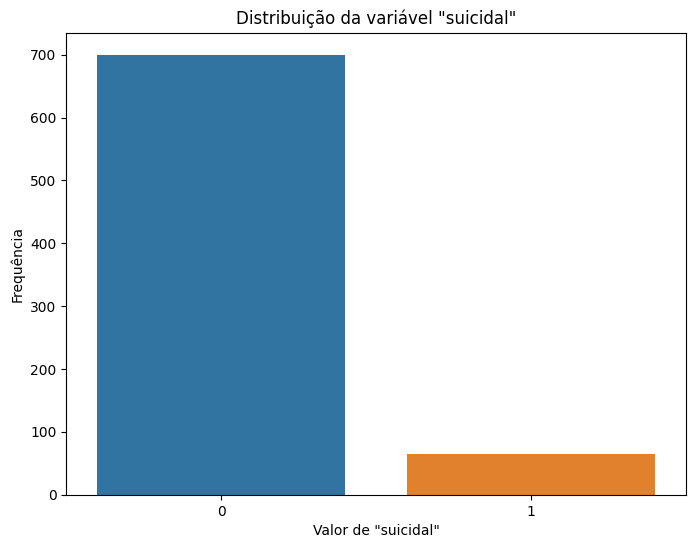

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Contar a frequência de cada valor na coluna "suicidal"
suicidal_counts = df_temp['suicidal'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=suicidal_counts.index, y=suicidal_counts.values)
plt.xlabel('Valor de "suicidal"')
plt.ylabel('Frequência')
plt.title('Distribuição da variável "suicidal"')
plt.show()



**A quantidade de sucidas co depressão é baixa de acordo com a amostragem**

*O codigo abaixo é para gerar os csvs*

In [30]:
df_cleaned.to_csv('Limpo.csv')

In [31]:
df_temp.to_csv('Categoricos.csv')

In [32]:
df_temp['treatment_status'] = df_temp['depression_treatment'] | df_temp['anxiety_treatment']
df_cleaned = df_temp

In [33]:
# Criando as colunas severity_index e phq_gad_relation (exemplo fictício)
df_temp['severity_index'] = df_temp['phq_score'] + df_temp['gad_score']
df_temp['phq_gad_relation'] = df_temp['phq_score'] / df_temp['gad_score']

# Calculando as diferenças nas médias entre tratamento e não tratamento
treatment_diff = df_temp[df_temp['treatment_status'] == 1].mean() - df_temp[df_cleaned['treatment_status'] == 0].mean()

# Imprimindo as diferenças nas médias
print("Differences in Means:")
print(treatment_diff)


Differences in Means:
id                                      -4.466117
school_year                             -0.107815
age                                      0.197665
gender                                  -0.084496
bmi                                     -0.733843
phq_score                                2.353037
depressiveness                           0.253507
suicidal                                 0.107409
depression_diagnosis                     0.551920
depression_treatment                     0.686747
gad_score                                1.632071
anxiousness                              0.126842
anxiety_diagnosis                        0.518708
anxiety_treatment                        0.710843
epworth_score                            0.690934
sleepiness                               0.051496
who_bmi_Class II Obesity                 0.006183
who_bmi_Class III Obesity               -0.005865
who_bmi_Normal                           0.014557
who_bmi_Not Availble        

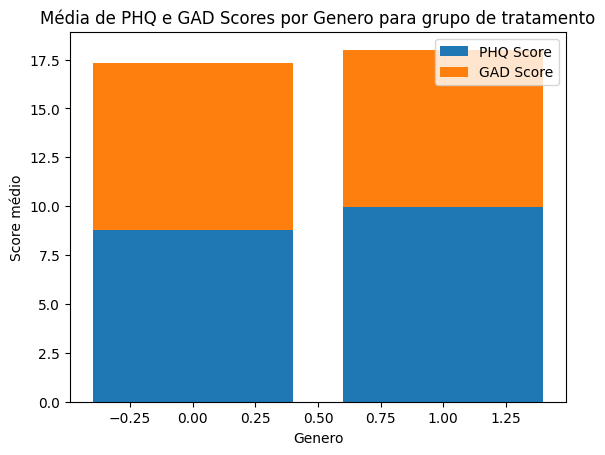

In [35]:
# Filtrando os dados para pessoas em tratamento
df_treatment = df_temp[df_temp['treatment_status'] == 1]

# Agrupando por gênero e calculando a média das variáveis de interesse
gender_grouped = df_treatment.groupby('gender')[['phq_score', 'gad_score']].mean()

# Configurando os dados para o gráfico
labels = gender_grouped.index
phq_means = gender_grouped['phq_score']
gad_means = gender_grouped['gad_score']

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots()
ax.bar(labels, phq_means, label='PHQ Score')
ax.bar(labels, gad_means, bottom=phq_means, label='GAD Score')

ax.set_xlabel('Genero')
ax.set_ylabel('Score médio')
ax.set_title('Média de PHQ e GAD Scores por Genero para grupo de tratamento')
ax.legend()

plt.show()

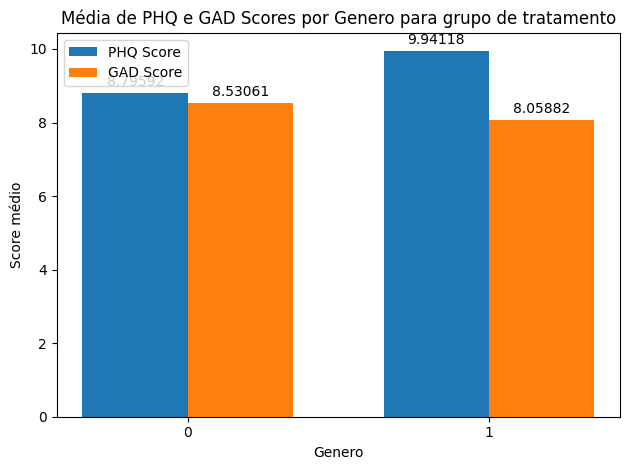

In [36]:
# Filtrando os dados para pessoas em tratamento
df_treatment = df_temp[df_temp['treatment_status'] == 1]

# Agrupando por gênero e calculando a média das variáveis de interesse
gender_grouped = df_treatment.groupby('gender')[['phq_score', 'gad_score']].mean()

# Configurando os dados para o gráfico
labels = gender_grouped.index
phq_means = gender_grouped['phq_score']
gad_means = gender_grouped['gad_score']

x = np.arange(len(labels))  # a localização das barras
width = 0.35  # a largura das barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, phq_means, width, label='PHQ Score')
rects2 = ax.bar(x + width/2, gad_means, width, label='GAD Score')

ax.set_xlabel('Genero')
ax.set_ylabel('Score médio')
ax.set_title('Média de PHQ e GAD Scores por Genero para grupo de tratamento')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

*No geral, a análise revelou que a busca por tratamento está correlacionada com uma média de mais de 8 nos testes PHQ e GAD. Os gráficos acima destacam que tanto homens quanto mulheres estão buscando tratamento, mas notamos uma quantidade significativamente maior de mulheres nesse grupo. Para explorar mais profundamente esses padrões, estamos desenvolvendo um modelo de regressão que nos ajudará a prever como essas variáveis, como gênero e escores nos testes, influenciam a busca por tratamento. Esse modelo nos permitirá tomar decisões mais informadas e criar estratégias mais eficazes para apoiar as pessoas que estão enfrentando desafios de saúde mental.*

In [37]:
# Carregar o dataset
df = df_temp  # Substitua pelo nome do seu arquivo

# Selecionando as variáveis de entrada (features) e a variável alvo (target)
X = df[['phq_score', 'gad_score', 'gender']]
y = df['treatment_status']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Realizando previsões nos dados de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimindo um relatório de classificação
print(classification_report(y_test, y_pred))

Accuracy: 0.8627450980392157
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       132
           1       0.00      0.00      0.00        21

    accuracy                           0.86       153
   macro avg       0.43      0.50      0.46       153
weighted avg       0.74      0.86      0.80       153



c:\Users\vane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Temos poucos dados, vou usar a tecnica de oversampling, temos mais mulher do que homem no df, principalmente em tratamento

In [38]:
data_majority = df[df['treatment_status'] == 0]
data_minority = df[df['treatment_status'] == 1]


In [39]:
data_minority_oversampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)


In [40]:
df_oversampled = pd.concat([data_majority, data_minority_oversampled])


In [41]:
# Dividir os dados em conjunto de treinamento e teste
X = df_oversampled[['phq_score', 'gad_score', 'gender']]
y = df_oversampled['treatment_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e ajustar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.575091575091575
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       144
           1       0.55      0.51      0.53       129

    accuracy                           0.58       273
   macro avg       0.57      0.57      0.57       273
weighted avg       0.57      0.58      0.57       273



**Observações finais:**

*No último modelo que desenvolvemos, observamos uma diminuição ligeira no coeficiente de determinação (R²), mas notamos um aumento em todas as outras medidas de avaliação. A razão para esse comportamento é que agora nosso modelo pode distinguir mais efetivamente os casos '1' dos casos '0'. Isso resultou em uma eficácia geral aprimorada. A estratégia de oversampling, que envolveu o aumento da representação dos casos menos frequentes, foi aplicada aqui. Embora essa técnica nem sempre seja indicada, ela teve um resultado interessante para o problema que estamos abordando.*

*Nosso principal objetivo aqui é entender por que os homens que apresentam resultados semelhantes aos das mulheres nos testes GAD e PHQ não estão buscando tratamento. Essa análise pode fornecer insights valiosos para criar algoritmos e estratégias que incentivem os homens a buscar ajuda, uma vez que as mulheres já o fazem. Um reflexo disso é a discrepância no nosso conjunto de dados, onde observamos uma presença significativamente maior de mulheres. Esses insights podem ser cruciais para melhorar o acesso e a conscientização sobre a saúde mental masculina.*

*Gostaria de expressar meus sinceros agradecimentos a toda a equipe que participou deste projeto. Cada um desempenhou um papel fundamental e contribuiu significativamente para o seu sucesso.*:

*Responsável pela limpeza e integridade dos dados: Matheus Costa*

  Matheus fez um trabalho excepcional ao garantir a qualidade e integridade dos nossos dados. Sua expertise em análise de dados foi fundamental para preparar nosso conjunto de dados.

*Responsavel pela definição do problema: João*

 João desempenhou um papel crucial ao identificar e definir o problema que estávamos buscando resolver. Seu conhecimento abrangente sobre o impacto da depressão, especialmente em âmbito nacional, orientou nossa abordagem.

*Especialistas no assunto: João e Thayla*	

 João e Thayla trouxeram uma riqueza de conhecimento como especialistas em saúde. Thayla, em particular, trouxe uma perspectiva valiosa como mulher e analista de BI, enriquecendo nosso entendimento.

*Responsavel pelo ml: Vane Woll*

 Sou grato por ter tido a oportunidade de liderar a parte de aprendizado de máquina deste projeto. Decidimos a abordagem de modelo de aprendizado de máquina e implementamos técnicas de oversampling para melhorar nossos resultados. Foi uma experiência valiosa.

*Responsavel geral: Vane Woll*

 Como responsável geral, fui abençoado por trabalhar com uma equipe dedicada e talentosa. Este projeto não teria se concretizado sem o comprometimento de todos vocês. Muito obrigado por tornarem isso possível!"